# Kadir Berat YILDIRIM BM686 Homework 1

In this homework, after a little data exploration below, I use sklearn library to perform mentioned algorithms on the given dataset.

I begin by simply splitting the data into train/test set, but then move on to using cross validation with 100 subgroups for each algorithm as asked in the homework. 

### Summary of the results

Below are the required metrics results for each algorithm in given order in the homework (accuracy, preciosion, recall, f1 score, roc auc score). In the code below, I write my own function 'metrics' that calls all of these metrics from sklearn library for a given predictions and test sets. 

* k-nearest neighbor

array([0.97013333, 0.98591667, 0.97261667, 0.97668254, 0.97755833])

* Logistic regression

array([0.96983333, 0.99691667, 0.96478333, 0.97830873, 0.96104167])

* Support vector machine (SVM)

array([0.97556667, 0.98591667, 0.98001667, 0.98055635, 0.97170833])

* Decision tree

array([0.92046667, 0.92975   , 0.95236667, 0.93351667, 0.917375  ])

* Gradient boosted decision tree

array([0.9716    , 0.983     , 0.97783333, 0.97770952, 0.96791667])

* Naive bayes classifier

array([0.93416667, 0.95533333, 0.95146667, 0.94715159, 0.92675   ])

* Neural network (using Keras library with tensorflow backend)



* MultiLayer Perceptron

array([0.8393    , 0.97983333, 0.84823333, 0.89513492, 0.79210417])

* Random forest algorithm

array([0.9599    , 0.97483333, 0.96908333, 0.96832698, 0.95508333])

---



---

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


First column represents IDs and the second
column represents the prognosis (either benign or malignant). Other 30 features are computed
from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe
characteristics of the cell nuclei present in the image and will be used for prognosis of the mass.

In [5]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
df.drop('Unnamed: 32', axis = 1, inplace = True) # Get rid of faulty column
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


---

In [8]:
import seaborn as sns

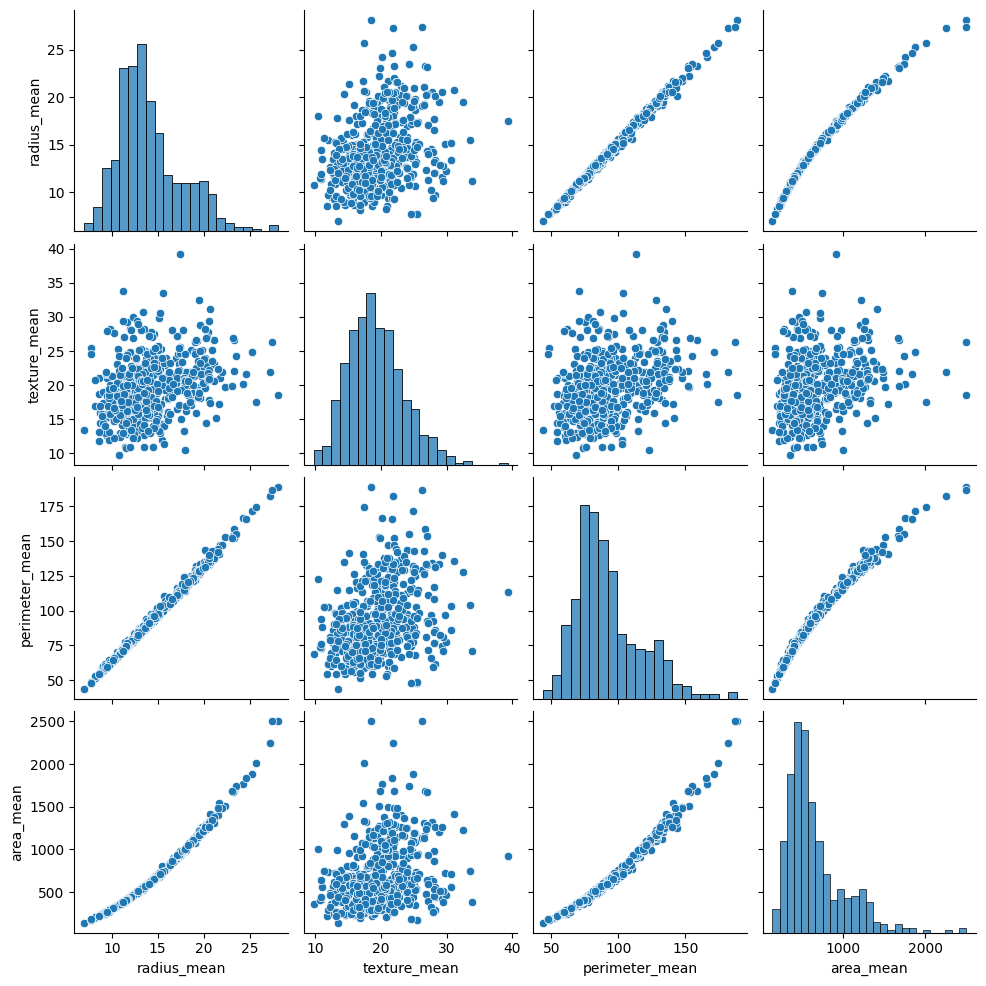

In [9]:
sns.pairplot(df.iloc[:,2:6])

Distributions kind of look like a Poisson process, which is interesting.

---

# Preprocessing

In [10]:
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [17]:
from sklearn.model_selection import train_test_split

y = df.diagnosis.to_numpy()
X = df.iloc[:, 2:].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25)

print('Train set size: ', len(X_train), '\nTest set size: ', len(X_test))

Train set size:  426 
Test set size:  143


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print('X Train max value: ', X_train_scaled.max(), '\nX Test max value: ', X_test_scaled.max())
print('X Train min value: ', X_train_scaled.min(), '\nX Test min value: ', X_test_scaled.min())

X Train max value:  1.0000000000000002 
X Test max value:  1.6295425395468146
X Train min value:  0.0 
X Test min value:  -0.07784431137724557


---

# k-nearest neightbor

To begin with, I choose k = 3.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X_train_scaled, y_train)

preds = neigh.predict(X_test_scaled)
print('Correct: ', sum([1 for i in range(len(y_test)) if preds[i] == y_test[i]]), \
      'Out of: ', len(y_test))

Correct:  139 Out of:  143


We could also try different k values in a for loop.

In [33]:
for k in list(range(1, 16)):
    neigh = KNeighborsClassifier(n_neighbors = k)
    neigh.fit(X_train_scaled, y_train)
    preds = neigh.predict(X_test_scaled)
    print('For k = ', k, '\tCorrect: ', sum([1 for i in range(len(y_test)) if preds[i] == y_test[i]]), \
          'Out of: ', len(y_test))

For k =  1 	Correct:  138 Out of:  143
For k =  2 	Correct:  135 Out of:  143
For k =  3 	Correct:  139 Out of:  143
For k =  4 	Correct:  138 Out of:  143
For k =  5 	Correct:  139 Out of:  143
For k =  6 	Correct:  139 Out of:  143
For k =  7 	Correct:  140 Out of:  143
For k =  8 	Correct:  138 Out of:  143
For k =  9 	Correct:  139 Out of:  143
For k =  10 	Correct:  139 Out of:  143
For k =  11 	Correct:  139 Out of:  143
For k =  12 	Correct:  137 Out of:  143
For k =  13 	Correct:  138 Out of:  143
For k =  14 	Correct:  137 Out of:  143
For k =  15 	Correct:  137 Out of:  143


k = 7 gives the best result out of all of these k values.

# Methods to use with all algorithms

In [38]:
from sklearn.preprocessing import MinMaxScaler

def scale(X_train, X_test, verbose = False):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    if verbose:
        print('X Train max value: ', X_train_scaled.max(), '\nX Test max value: ', X_test_scaled.max())
        print('X Train min value: ', X_train_scaled.min(), '\nX Test min value: ', X_test_scaled.min())
    return X_train_scaled, X_test_scaled

In [132]:
from sklearn.preprocessing import OneHotEncoder

def onehot(y_train, y_test):
    ohe = OneHotEncoder()
    train = ohe.fit_transform(y_train.reshape(-1, 1)).toarray()
    test = ohe.transform(y_test.reshape(-1, 1)).toarray()
    return train, test, ohe

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def metrics(preds, y_test, ohe, verbose = False):
    # Only roc auc uses onehot encoded form, for other metrics, use string form
    # So I inverse transform here, since I will give onehot encoded form here
    inv_preds = ohe.inverse_transform(preds)
    inv_y_test = ohe.inverse_transform(y_test)
    
    acc = accuracy_score(inv_preds, inv_y_test)
    precision = precision_score(inv_preds, inv_y_test, pos_label = 'B')
    recall = recall_score(inv_preds, inv_y_test, pos_label = 'B')
    f1 = f1_score(inv_preds, inv_y_test, pos_label = 'B')
    
    ras = roc_auc_score(y_test, preds)
    
    if verbose:
        print('Accuracy: ', acc, \
             '\nPrecision: ', precision, \
             '\nRecall: ', recall, \
             '\nF1 Score: ', f1, \
             '\nRoc Auc Score: ', ras)
    return [acc, precision, recall, f1, ras]

---

# Cross Validation with KNN

Below I use KFold method to divide the dataset into 100 subgroups and iterate 100 times fitting the model with 99 of those subgroups and testing with 1 subgroup in each iteration. While iterating, I save the metrics in an array called scores which then I use to average each metric.

In [75]:
from sklearn.model_selection import RepeatedStratifiedKFold

kf = RepeatedStratifiedKFold(n_splits = 100)
kf.get_n_splits(X, y)

scores = []
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    # Preprocess
    X_train_scaled, X_test_scaled = scale(X[train_index], X[test_index])
    y_train, y_test, ohe = onehot(y[train_index], y[test_index])
    
    for _ in range(100):
        # Train model
        neigh = KNeighborsClassifier(n_neighbors = 7)
        neigh.fit(X_train_scaled, y_train)
        # Predict and score
        preds = neigh.predict(X_test_scaled)
        scores.append(metrics(preds, y_test, ohe))

In [76]:
np.array(scores).mean(axis = 0)

array([0.97013333, 0.98591667, 0.97261667, 0.97668254, 0.97755833])

---

# Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

kf = RepeatedStratifiedKFold(n_splits = 100)
kf.get_n_splits(X, y)

scores = []
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    # Preprocess
    X_train_scaled, X_test_scaled = scale(X[train_index], X[test_index])
    y_train, y_test, ohe = onehot(y[train_index], y[test_index])
    
    for _ in range(100):
        LR = LogisticRegression(random_state=0).fit(X_train_scaled, y[train_index])
        preds = LR.predict(X_test_scaled)
        scores.append(metrics(ohe.transform(preds.reshape(-1, 1)).toarray(), y_test, ohe))
    
np.array(scores).mean(axis = 0)

array([0.96983333, 0.99691667, 0.96478333, 0.97830873, 0.96104167])

---

# Support Vector Machine

In [107]:
from sklearn import svm

scores = []
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    # Preprocess
    X_train_scaled, X_test_scaled = scale(X[train_index], X[test_index])
    y_train, y_test, ohe = onehot(y[train_index], y[test_index])
    
    for _ in range(100):
        clf = svm.SVC()
        clf.fit(X_train_scaled, y[train_index])
        preds = clf.predict(X_test_scaled)
        scores.append(metrics(ohe.transform(preds.reshape(-1, 1)).toarray(), y_test, ohe))
        
np.array(scores).mean(axis = 0)

array([0.97556667, 0.98591667, 0.98001667, 0.98055635, 0.97170833])

---

# Decision Tree Clasifier

In [110]:
from sklearn import tree

scores = []
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    # Preprocess
    X_train_scaled, X_test_scaled = scale(X[train_index], X[test_index])
    y_train, y_test, ohe = onehot(y[train_index], y[test_index])
    
    for _ in range(100):
        clf = tree.DecisionTreeClassifier()
        clf.fit(X_train_scaled, y_train)
        preds = clf.predict(X_test_scaled)
        scores.append(metrics(preds, y_test, ohe))
        
np.array(scores).mean(axis = 0)

array([0.92046667, 0.92975   , 0.95236667, 0.93351667, 0.917375  ])

---

# Gradient Boosted Decision Tree Classifier

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

scores = []
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    # Preprocess
    X_train_scaled, X_test_scaled = scale(X[train_index], X[test_index])
    y_train, y_test, ohe = onehot(y[train_index], y[test_index])
    
    for _ in range(100):
        clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
        clf.fit(X_train_scaled, y[train_index])
        preds = clf.predict(X_test_scaled)
        scores.append(metrics(ohe.transform(preds.reshape(-1, 1)).toarray(), y_test, ohe))
        
np.array(scores).mean(axis = 0)

array([0.9716    , 0.983     , 0.97783333, 0.97770952, 0.96791667])

---

# Naive Bayes Classifier

In [116]:
from sklearn.naive_bayes import GaussianNB

scores = []
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    # Preprocess
    X_train_scaled, X_test_scaled = scale(X[train_index], X[test_index])
    y_train, y_test, ohe = onehot(y[train_index], y[test_index])
    
    for _ in range(100):
        clf = GaussianNB()
        clf.fit(X_train_scaled, y[train_index])
        preds = clf.predict(X_test_scaled)
        scores.append(metrics(ohe.transform(preds.reshape(-1, 1)).toarray(), y_test, ohe))
        
np.array(scores).mean(axis = 0)

array([0.93416667, 0.95533333, 0.95146667, 0.94715159, 0.92675   ])

---

# Neural Network with Keras

I create a shallow neural network for classification.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder

def create_nn():
    model = Sequential()
    model.add(Dense(64, input_dim = 30, activation = 'relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(2, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

scores = []
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    # Preprocess
    X_train_scaled, X_test_scaled = scale(X[train_index], X[test_index])
    y_train, y_test, ohe = onehot(y[train_index], y[test_index])
    
    ohe = OneHotEncoder()
    yohe = ohe.fit_transform(y[train_index].reshape(-1, 1)).toarray()
    
    clf = create_nn()
    history = clf.fit(X_train_scaled, yohe, epochs=20, batch_size=64, verbose = 0)
    preds = clf.predict(X_test_scaled)
    preds = np.array([[0, 1] if i[1] > i[0] else [1,0] for i in preds])
    
    scores.append(metrics(preds, ohe.transform(y[test_index].reshape(-1, 1)).toarray(), ohe))
    
np.array(scores).mean(axis = 0)

---

# MultiLayer Perceptron

In [127]:
from sklearn.neural_network import MLPClassifier

scores = []
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    # Preprocess
    X_train_scaled, X_test_scaled = scale(X[train_index], X[test_index])
    y_train, y_test, ohe = onehot(y[train_index], y[test_index])
    
    for _ in range(100):
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(64, 32, 2))
        clf.fit(X_train_scaled, y_train)
        preds = clf.predict(X_test_scaled)
        scores.append(metrics(preds, y_test, ohe))
        
np.array(scores).mean(axis = 0)

array([0.8393    , 0.97983333, 0.84823333, 0.89513492, 0.79210417])

---

# Random Forest Classifier

In [140]:
from sklearn.ensemble import RandomForestClassifier

scores = []
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    # Preprocess
    X_train_scaled, X_test_scaled = scale(X[train_index], X[test_index])
    y_train, y_test, ohe = onehot(y[train_index], y[test_index])
    
    
    clf = RandomForestClassifier()
    clf.fit(X_train_scaled, y[train_index])
    preds = clf.predict(X_test_scaled)
    scores.append(metrics(ohe.transform(preds.reshape(-1, 1)).toarray(), y_test, ohe))
    
np.array(scores).mean(axis = 0)

array([0.9599    , 0.97483333, 0.96908333, 0.96832698, 0.95508333])

---

# Appendix

## Auto ML - PyCaret Classification

There is a library - PyCaret - which for a given dataset, tries various algorithms and returns the best model.

In [ ]:
df.drop('id', axis = 1, inplace = True)
df.head()

In [5]:
dfs = np.split(df, [500], axis = 0)

In [9]:
from pycaret.classification import *

s = setup(dfs[0], target = 'diagnosis')

best = compare_models()

,Description,Value
0,Session id,3449
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(500, 32)"
5,Transformed data shape,"(500, 32)"
6,Transformed train set shape,"(350, 32)"
7,Transformed test set shape,"(150, 32)"
8,Numeric features,31
9,Rows with missing values,100.0%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9686,0.9886,0.9412,0.9775,0.9586,0.9333,0.9342,0.0420
dummy,Dummy Classifier,0.6114,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0140


In [10]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
preds = predict_model(best, data = dfs[1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,0,0,0,1.0000,1.0000


In [ ]:
save_model(best, 'model_name')